Lets first create the basic workflow

In [23]:
#Import the langgraph library first
from langgraph.graph import Graph

In [24]:
import os
from dotenv import load_dotenv
load_dotenv()
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [25]:
#initiate it
workflow=Graph()

In [26]:
#Add a decision function as Node
def function1(input1):
    return input1 + "from first function"
workflow.add_node("firstnode", function1)

In [27]:
#Add a another node
def function2(input2):
    return input2 + " " + "and input from second function"
workflow.add_node("node2",function2)

In [28]:
#Add connection between node1 and node2
workflow.add_edge("firstnode","node2")

In [29]:
workflow.set_entry_point("firstnode")
workflow.set_finish_point("node2")

In [30]:
#compile the graph
app=workflow.compile()

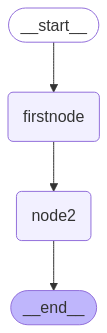

In [31]:
#Display the workflow now
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [32]:
app.invoke("this is first simple GRAPH example ")

'this is first simple GRAPH example from first function and input from second function'

create workflow with llm

In [33]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
llm.invoke("hi").content


'Hi there! How can I help you today?'

In [34]:
#define the input function
def function1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
    response=llm.invoke(input).content
    return response

In [35]:
#add a task like convert output in Upper case
def function2(input):
    upper_case=input.upper()
    return upper_case

In [36]:
workflow2=Graph()
workflow2.add_node("llm",function1)
workflow2.add_node("upper_string",function2)
workflow2.add_edge("llm","upper_string")
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [37]:
app2=workflow2.compile()

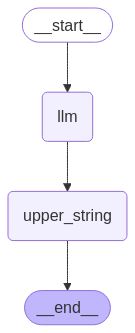

In [38]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [39]:
print(app2.invoke("what is genai explain in detail?"))

"GENAI" IS SHORTHAND FOR **GENERATIVE ARTIFICIAL INTELLIGENCE**.  IT'S A CATEGORY OF ARTIFICIAL INTELLIGENCE ALGORITHMS THAT ARE FOCUSED ON CREATING NEW, ORIGINAL CONTENT.  THIS CONTENT CAN SPAN A WIDE RANGE OF FORMATS, INCLUDING:

* **TEXT:**  POEMS, CODE, SCRIPTS, MUSICAL PIECES, EMAIL, LETTERS, ETC.
* **IMAGES:**  PHOTOS, DIGITAL ART, SKETCHES, LOGOS, ETC.
* **AUDIO:**  MUSIC, VOICEOVERS, SOUND EFFECTS, ETC.
* **VIDEO:**  SHORT FILMS, ANIMATIONS, ETC.
* **3D MODELS:**  OBJECTS, ENVIRONMENTS, CHARACTERS, ETC.
* **OTHER DATA:**  SUCH AS SIMULATIONS, DESIGNS, OR EVEN DRUG MOLECULES.


**HOW GENAI WORKS:**

AT THE HEART OF MOST GENAI SYSTEMS ARE COMPLEX ALGORITHMS, OFTEN BASED ON **NEURAL NETWORKS**, PARTICULARLY A TYPE CALLED **DEEP LEARNING MODELS**. THESE MODELS ARE TRAINED ON MASSIVE DATASETS OF EXISTING CONTENT. THROUGH THIS TRAINING, THE MODEL LEARNS THE UNDERLYING PATTERNS, STRUCTURES, AND STYLES PRESENT IN THE DATA.  ONCE TRAINED, IT CAN THEN GENERATE NEW CONTENT THAT REFLECTS T

In [40]:
#let's understand how the graph is working step by step
input="what is full form of rag in genai?"

In [41]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
In the context of generative AI, RAG stands for **Retrieval Augmented Generation**.


here is output from upper_string
_______
IN THE CONTEXT OF GENERATIVE AI, RAG STANDS FOR **RETRIEVAL AUGMENTED GENERATION**.




In [42]:
# Print the API key to verify it is loaded correctly
#print(f"TAVILY_API_KEY: {os.getenv('TAVILY_API_KEY')}")

In [43]:
#Till now its working fine as expected. Let's add a serch capability now
#Generate your key for Tavily at https://tavily.com/
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'title': 'LangGraph Glossary - GitHub Pages',
  'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id).\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\n[](https://langchain-ai.github.io/langgraph/concepts/low_level/#__codelineno-7-1)fromlangchain_core.runnablesimport RunnableConfig [...] LangGraph Glossary¶\nGraphs¶\nAt its core, LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:\n\n\nState: A shared data structure that represents the current snapshot of your application. It can be any Python type, but is typically a TypedDict or Pydantic BaseModel.\n\n\nNodes: Python functions that encode the logic of your agents. They 

Look how great its working, serching web for relevant answer with high confidence score
In next part , we will add RAG capibilty in our workflow